In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\buran\OneDrive\Desktop\Programs\venv\Scripts\python.exe -m pip install --upgrade pip' command.


### Import necessary libraries

In [2]:
import numpy as np
np.random.seed(123)


In [3]:
import tensorflow as tf
tf.random.set_seed(123)

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from tensorflow import keras
from keras import backend as K

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

### Loading the MNIST Dataset

In [8]:
# load the train dataset
X = pd.read_csv(
    "train.csv")
X

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Exploration and visualization

In [9]:
(X_train, X_test, y_train, y_test) = train_test_split(
    X.drop(columns=['label']), 
    X['label'], 
    test_size=0.2, 
    random_state=123)

display(X_train)
display(y_train)
display(X_test)
display(y_test)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


30261    2
28092    2
1        0
23997    9
7316     4
        ..
32601    0
5311     1
31234    5
7859     0
10737    9
Name: label, Length: 8400, dtype: int64

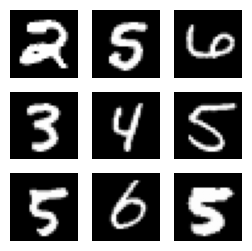

In [10]:
# Sample 9 mnist digits from train dataset
indexes = np.random.randint(0, X_train.shape[0], size=9)
images = X_train.iloc[indexes]
labels = y_train.iloc[indexes]

# Plot the 9 mnist digits
plt.figure(figsize=(3, 3))
for i in range(len(indexes)):
    plt.subplot(3, 3, i + 1)
    image = images.iloc[i].values
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

### Data Preprocessing

- The relevant processes here are to one-hot encode the labels. We will convert the class labels (0-9) to OHE vectors. This is necessary for the output layer of the ANN.

- Reshape the data. This would be necessary if we had multi-dimensional vectors, but we have rows of 784 columns already.

- Normalize the data: Scale every pixel value to the rance of [0, 1] by dividing it by 255. This helps train the network faster and more efficiently.

#### One Hot Encode the Labels

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
num_labels = len(np.unique(y_train))
num_labels

10

In [13]:
from keras.utils import to_categorical

y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)

print('A sample output before encoding: ', y_train[0])
print('A sample output after encoding: ', y_train_enc[0])

A sample output before encoding:  1
A sample output after encoding:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


#### Reshape and flatten images

Each image is 28 x 28 pixels. Each pixel has a pixel value associated with it, indicating the lightness or darkness of that pixel, higher values meaning darker. It ranges from 0-255 inclusive.

In [14]:
# Our columns are already one-dimensional
X_train.iloc[0, :]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 40572, Length: 784, dtype: int64

In [15]:
# But we can see that they are not normalized
X_train.iloc[0, :].value_counts()

40572
0      557
253     61
254     38
255      5
234      5
      ... 
26       1
3        1
119      1
155      1
103      1
Name: count, Length: 94, dtype: int64

#### Normalize the Data

In [16]:
# Preprocess input data
print('Range of X_train before re-scaling: ',
      X_train.min().min(), ' to ', X_train.max().max())

Range of X_train before re-scaling:  0  to  255


In [17]:
X_train_ = X_train / 255.0
X_test_ = X_test / 255.0

In [18]:
print('Range of X_train before re-scaling: ', 
      X_train_.min().min(), ' to ', X_train_.max().max())

Range of X_train before re-scaling:  0.0  to  1.0


### Desining ANN model using Keras Functional API

We will use the MLP model

In [19]:
# Network parameters
batch_size = 128

#### Designing the model architecture

- The model will be made of three MLP layers

- An MLP layer is referred to as 'Dense' which stands for the densely connected layer.

- Both the first and second MLP layers are identical in nature with 256 neurons each and with ReLU activiation.

- Output layer has 10 neurons, which is equal to the number of output categories and has a softmax activation.

- The main structure in Keras is the Sequential class, which allows creation of a basic neural network.

- The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:

from keras.models import Sequential

model = Sequential()

- The model in Keras is considered as a sequence of layers and each of them gradually "distills" the input data to obtain the desired output.

- In Keras, we can add the required types of layers through the add() method.

In [20]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

In [21]:
help(Sequential())

Help on Sequential in module keras.src.models.sequential object:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When using the delayed-build

In [22]:
model = Sequential()
model.add(Input(shape=(784,))) #Input tensor
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))

Since a Dense layer is a linear operation, a sequence of Dense layers can only approximate a linear function.

The MNIST digit classifier is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings.

ReLU is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras import layers, models

In [24]:
# Plotting the model
from keras.utils import plot_model
plot_model(model, show_shapes=True,
           show_layer_names=True,
           dpi=50,
           show_layer_activations=True,
           show_trainable=True)
plt.show()

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


#### Compile the model with compile() method

Loss function (categorical_crossentropy)


How far the predicted tensor is from the one-hot ground truth vector is called 'loss'. In this example, we use categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of loss function is not arbitrary, but should be a criterion that the model is learning.

For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activiation layer. The binary_crossentropy loss function is normally used after the sigmoid activiation layer while mean_squared_error is an option for tanh output.

Optimization (optimizer adam)
With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

In Keras, there are several choices for optimizers. The most commonly used optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam) and Root Mean Squared Propagation (RMSprop).

Each optimizer features tunable parameters like learning rate, momentum, and decay.

Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

Metrics (accuracy)
Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss.

During training, validation, and testing, other metrics such as accuracy can also be included.

Accuracy is the percent, or fraction, of correct predictions based on ground truth.

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Fit your model
history = model.fit(X_train_, y_train_enc, 
                    epochs=20, 
                    batch_size=batch_size, 
                    validation_split=0.1)

Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8015 - loss: 0.6783 - val_accuracy: 0.9405 - val_loss: 0.1961
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9511 - loss: 0.1597 - val_accuracy: 0.9568 - val_loss: 0.1362
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.0976 - val_accuracy: 0.9592 - val_loss: 0.1271
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9791 - loss: 0.0653 - val_accuracy: 0.9640 - val_loss: 0.1212
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0489 - val_accuracy: 0.9667 - val_loss: 0.1247
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9891 - loss: 0.0375 - val_accuracy: 0.9542 - val_loss: 0.1806
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9897 - loss: 0.0319 - val_accuracy: 0.9631 - val_loss: 0.1446
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9924 - loss: 0.0232 - val_accuracy: 0.

In [27]:
# Evaluate your model
train_loss, train_acc = model.evaluate(X_train_, y_train_enc, batch_size=batch_size)
print('\nTrain accuracy:', round(train_acc, 3))
print('\nTrain loss:', round(train_loss, 3))

test_loss, test_acc = model.evaluate(X_test_, y_test_enc, batch_size=batch_size)
print('\nTest accuracy:', round(test_acc, 3))
print('\nTest loss:', round(test_loss, 3))

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0178

Train accuracy: 0.991

Train loss: 0.034
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9672 - loss: 0.1747

Test accuracy: 0.97

Test loss: 0.159


#### Monitoring the training process

In [28]:
pd.DataFrame(history.history).head()

,accuracy,loss,val_accuracy,val_loss
0,0.881052,0.401943,0.944048,0.184689
1,0.957540,0.141246,0.958631,0.135444
2,0.973380,0.088527,0.962798,0.130474
3,0.982011,0.060490,0.963393,0.122154
4,0.986806,0.044744,0.964286,0.128078


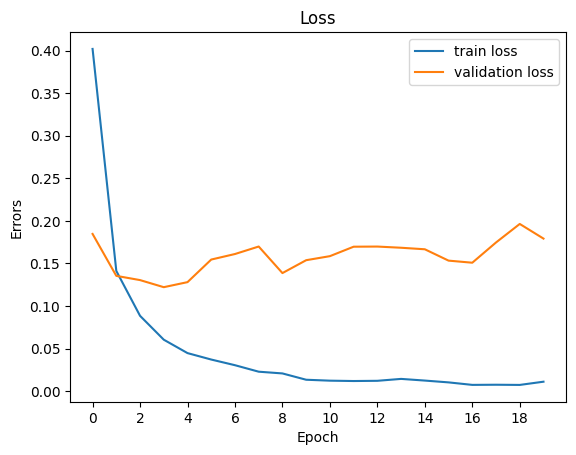

In [29]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')

#Set x-axis ticks to be integers
plt.xticks(np.arange(0, len(history.history['loss']), step=2))

plt.ylabel('Errors')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

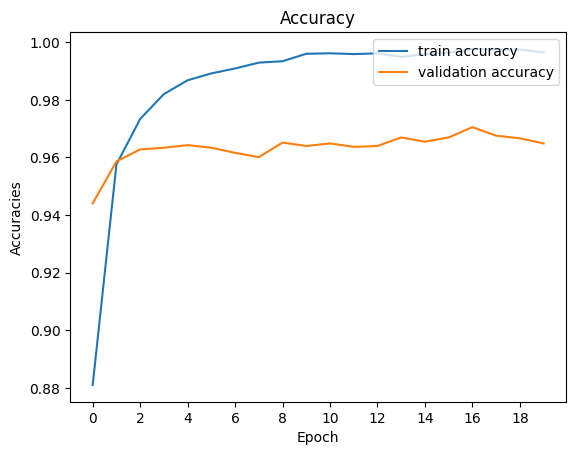

In [30]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

#Set x-axis ticks to be integers
plt.xticks(np.arange(0, len(history.history['loss']), step=2))

plt.ylabel('Accuracies')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


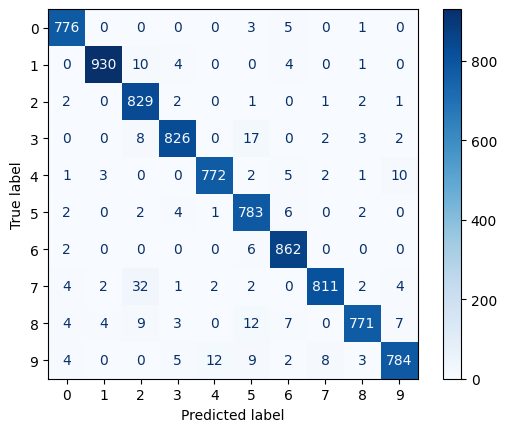

In [32]:
# Make predictions

y_pred = model.predict(X_test_)
y_pred_categorical = np.argmax(y_pred, axis=1)
y_test_categorical = np.argmax(y_test_enc, axis=1)

cm = confusion_matrix(y_test_categorical, y_pred_categorical)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_test_categorical))
disp.plot(cmap='Blues')
plt.show()

In [68]:
# We can see that the model frequently misclassifies 7 as 2 and 3 as 5
sevens = X_test_[y_test == 7]
sevens

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


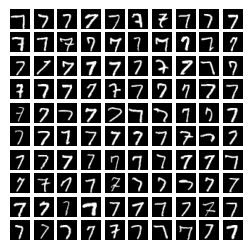

In [39]:
# Sample 9 mnist digits from train dataset
indexes = np.random.randint(0, sevens.shape[0], size=100)
images = sevens.iloc[indexes]
labels = sevens.iloc[indexes]

# Plot the 9 mnist digits
plt.figure(figsize=(3, 3))
for i in range(len(indexes)):
    plt.subplot(10, 10, i + 1)
    image = images.iloc[i].values
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

In [53]:
# Now let's see the 2's
twos = X_test_[y_test == 2]
twos

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


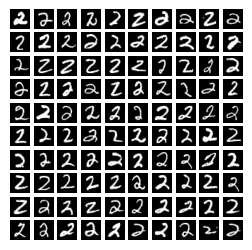

In [41]:
# Sample 9 mnist digits from train dataset
indexes = np.random.randint(0, twos.shape[0], size=100)
images = twos.iloc[indexes]
labels = twos.iloc[indexes]

# Plot the 9 mnist digits
plt.figure(figsize=(3, 3))
for i in range(len(indexes)):
    plt.subplot(10, 10, i + 1)
    image = images.iloc[i].values
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

#### Trying a traditional scikit learn model for multi-class regression

In [43]:
X_train_

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
y_train

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
ovr = OneVsRestClassifier(LogisticRegression()).fit(X_train_, y_train)
ovr

OneVsRestClassifier(estimator=LogisticRegression())

In [49]:
# Scoring the model on training data
ovr.score(X_train_, y_train)

0.93125

In [50]:
# Scoring the model on test data
ovr.score(X_test_, y_test)

0.9136904761904762

In [51]:
y_pred_ovr = ovr.predict(X_test_)
y_pred_ovr

array([2, 2, 0, ..., 5, 0, 9])

In [91]:
logistic_proba = ovr.predict_proba(X_test_)
logistic_proba[50].round(2)

array([0.  , 0.45, 0.01, 0.02, 0.  , 0.  , 0.  , 0.  , 0.51, 0.  ])

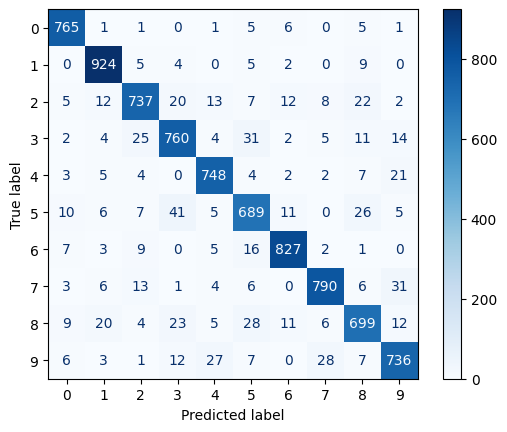

In [71]:
cm = confusion_matrix(y_test, y_pred_ovr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_test_categorical))
disp.plot(cmap='Blues')
plt.show()

In [90]:
y_pred[50].round(2)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [95]:
ensemble_preds = (y_pred + logistic_proba) / 2
ensemble_preds.round(2)

array([[0.  , 0.  , 0.94, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.02],
       [0.98, 0.  , 0.  , ..., 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.08, ..., 0.  , 0.  , 0.92]])

In [93]:
ensemble_labels = np.argmax(ensemble_preds, axis=1)
ensemble_labels

array([2, 2, 0, ..., 5, 0, 9])

In [98]:
ensemble_preds

array([[1.71929485e-09, 6.43512970e-05, 9.43090222e-01, ...,
        6.64957397e-09, 9.91490763e-07, 4.00245060e-10],
       [2.29847744e-05, 1.39310613e-09, 9.98718976e-01, ...,
        7.98057406e-05, 3.14083006e-04, 2.26705966e-04],
       [9.88273266e-01, 1.77581379e-14, 1.16280207e-02, ...,
        4.99177820e-07, 6.31628123e-05, 1.98726386e-06],
       ...,
       [1.16410193e-04, 1.47753449e-07, 6.66398125e-04, ...,
        1.05822426e-05, 3.36684666e-03, 1.60681233e-02],
       [9.79193016e-01, 3.76702253e-11, 6.39745845e-04, ...,
        3.07831981e-04, 3.31213061e-04, 1.08641228e-02],
       [1.13760622e-04, 2.48698951e-12, 8.43732632e-02, ...,
        2.44502641e-06, 1.14352575e-05, 9.15449180e-01]])

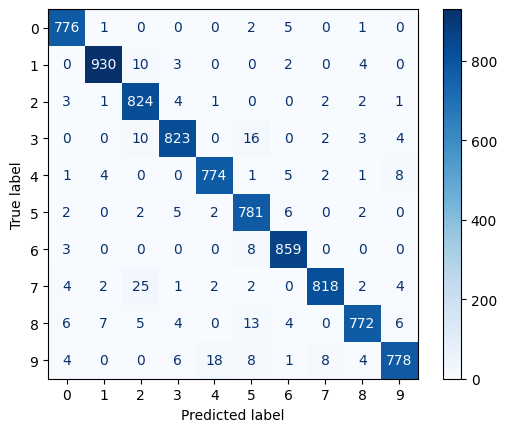

In [99]:

cm = confusion_matrix(y_test, ensemble_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_test_categorical))
disp.plot(cmap='Blues')
plt.show()

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
ensemble_score = accuracy_score(y_test, ensemble_labels)
ensemble_score

0.968452380952381

In [102]:
ensemble_labels.shape

(8400,)

## Create a submission file

In [105]:
submission_input = pd.read_csv('test.csv')
submission_input.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [106]:
# Preprocess input data by normalizing
submission_input_ = submission_input / 255.0
submission_input_.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000646,0.000287,0.000110,0.000044,0.000026,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021464,0.014184,0.007112,0.004726,0.003167,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.996078,0.756863,0.733333,0.466667,0.0,0.0,0.0,0.0,0.0


In [108]:
NN_proba = model.predict(submission_input_)
NN_proba.round(2)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [109]:
ovr_proba = ovr.predict_proba(submission_input_)
ovr_proba.round(2)

array([[0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.52],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.85],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ]])

In [110]:
submission_ensemble = (NN_proba + ovr_proba) / 2
submission_ensemble.round(2)

array([[0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.76],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.93],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ]])

In [113]:
submission_labels = np.argmax(submission_ensemble, axis=1)
submission_labels

array([2, 0, 9, ..., 3, 9, 2])

In [120]:
submission = pd.DataFrame({'ImageId': range(1, len(submission_labels) + 1), 'Label': submission_labels}, index=None)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [121]:
submission.to_csv('submission.csv', index=False)